In [319]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math

In [320]:
class ErrMethod:

    h_arr = np.array([2/2**n for n in range(1,21)])

    def __init__(self, method_name, method_func):
        self.mthd_name = method_name # название используемого численного метода 
        self.mthd_func = method_func # численный метод

    def GetErr(self, point, h, analitic_func):
        x = sp.Symbol('x')

        analitic_function = sp.lambdify(x, analitic_func)
        diff_analitic_function = sp.lambdify(x, sp.diff(analitic_func))
        
        return abs(diff_analitic_function(point) - self.mthd_func(analitic_function, point, h))

    def PlotErr(self, point, analitic_func):
        err = np.array([])
        for h in self.h_arr:
            err = np.append(err, self.GetErr(point, h, analitic_func))

        return plt.loglog(self.h_arr, err, marker='s', alpha=0.75, lw=1.5, ls='-', label=self.mthd_name)

In [321]:
class GraphErr:

    def __init__(self, function: tuple, err_method_map):
        self.function_name = function[0] # аналитическая функция
        self.function = function[1] # аналитическая функция
        self.mthd_map = err_method_map # набор численных методов

    def Plot(self, point):
        for meth in self.mthd_map:
            meth.PlotErr(point, self.function)

        plt.minorticks_on()
        plt.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
        plt.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

        plt.legend()
        plt.title(self.function_name)
        plt.xlabel('h')
        plt.ylabel(r'$\Delta f$')

    def BestMeth(self):
        pass

In [322]:
x = sp.Symbol('x')
func_map = {"sin(x^2)" : sp.sin(x ** 2), 
            "cos(sin(x))" : sp.cos(sp.sin(x)), 
            "exp(sin(cos(x)))" : sp.exp(sp.sin(sp.cos(x))), 
            "ln(x + 3)" : sp.log(x + 3),
            "(x + 3)^(0,5)" : (x + 3) ** (1/2)}

In [323]:
def meth1(f, x, h):
    return (f(x + h) - f(x)) / h

def meth2(f, x, h):
    return (f(x) - f(x - h)) / h

def meth3(f, x, h):
    return (f(x + h) - f(x - h)) / (2*h)

def meth4(f, x, h):
    return (4/3) * (f(x + h) - f(x - h)) / (2*h) - (1/3) * (f(x + 2*h) - f(x - 2*h)) / (4*h)

def meth5(f, x, h):
    return (3/2) * (f(x + h) - f(x - h)) / (2*h) - (3/5) * (f(x + 2*h) - f(x - 2*h)) / (4*h) + (1/10) * (f(x + 3*h) - f(x - 3*h)) / (6*h)

mthd_map = np.array([
    ErrMethod('meth1', meth1), 
    ErrMethod('meth2', meth2), 
    ErrMethod('meth3', meth3),
    ErrMethod('meth4', meth4),
    ErrMethod('meth5', meth5)
])

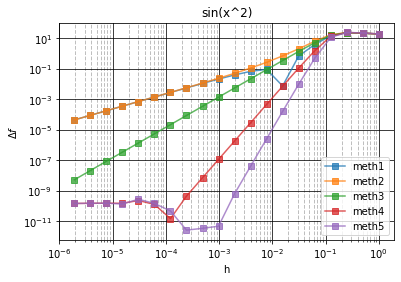

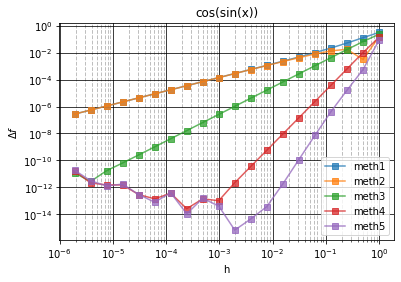

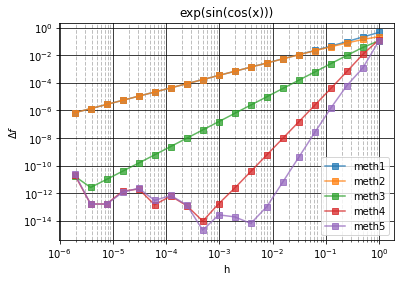

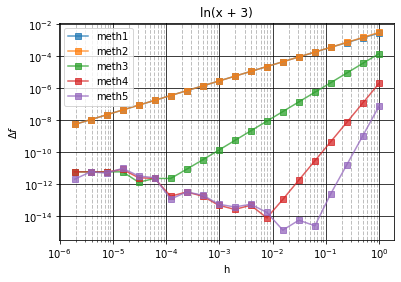

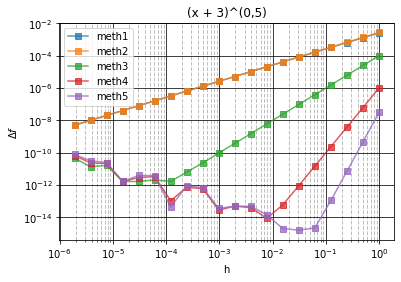

In [324]:
x0 = 10.33

for key in func_map.keys():
    figure, _ = plt.subplots()
    graph_obj = GraphErr((key, func_map[key]), mthd_map)
    graph_obj.Plot(x0)
    figure.savefig("images/" + str(key) + ".pdf")